# 16. Der Algorithmus von Shor

Der Shor-Algorithmus nutzt die Eigenschaften des Quantencomputers, um die Faktorisierung grosser Zahlen effizient zu lösen. Damit stellt er eine Bedrohung für die Sicherheit vieler Verschlüsselungsverfahren dar, insbesondere für RSA, da er die Faktorisierung der Schlüsselzahlen ermöglicht. Der Shor-Algorithmus nutzt die sog. Periodenfindung und die Quanten-Superposition, um dieses Ziel zu erreichen. Dazu wird eine periodische Funktion, die auf der Zahl, die faktorisiert werden soll, basiert, verwendet.

## Rekursive Faktorzerlegung

Die Einfachste Methode, eine grosse Zahl $N$ zu faktorisieren und dabei alle Teiler zu finden, besteht darin, alle ganzen Zahlen $x$ von $1$ bis $N$ mit der Funktion $x\ mod\ N=0$ abzufragen. Das lässt sich mit einer For-Schleife und einer If-Abfrage leicht umsetzen. Das Programm dazu könnte wiefolgt aussehen:

In [1]:
N = int(123456789)     #Die zu faktorisierende Zahl wird in eine Integervariable umgewandelt
k=0                    #Der Zähler wird auf 0 gesetzt
for x in range (2,N):
    if(N%x==0):        #Nur wenn N mod x =0 ist, teilt x ohne Rest
        print (x)      #und x wird dann ausgedruckt
        k+=1           #und der Zöhler wird um 1 erhöht
print ('Fertig!', 'Es wurden', k, 'nichttriviale Faktoren gefunden') #Test, um zu sehen, dass die For-Schleife vollständig durchgelaufen und die Berechnung abgeschlossen ist

3
9
3607
3803
10821
11409
32463
34227
13717421
41152263
Fertig! Es wurden 10 nichttriviale Faktoren gefunden


Das dauert schon ein paar Sekunden. Sie können die zu faktorisierende Zahl $N$ nun schrittweise vergrössern. Dabei werden Sie feststellen, dass sich mit jeder zusätzlichen Stelle die Berechnungsdauer etwa verzehnfacht. Die Rechenzeit hängt natürlich auch von der momentanen Auslastung Ihrer CPU ab. Mit der Funktion `int()` können Sie übrigens in Python beliebig lange Integerzahlen erzeugen. Wenn die Rechenzeit für die obige neun-stellige Zahl etwa $10\ s$ dauert, dann muss man mit derselben Rechenleistung für eine zwanzigstellige Zahl schon etwa mit $10^{12}\ s$ rechnen, was ungefähr einer Zeitspanne von $32'000$ Jahren entspricht. Es sind also effizientere Verfahren gesucht.

## Grundidee des Shor-Algorithmus:

Der Shor-Algorithmus beruht auf der Idee, die **Ordnung** bzw. die **Periode** einer **Zahl modulo einer anderen Zahl** zu bestimmen. Diese Ordnung bzw. Periode ist die kleinste positive ganze Zahl, die die Exponentialfunktion mit einer Basis und einer gegebenen Zahl als Argument periodisch macht.

Schritt für Schritt:

1. **Problemstellung:** Es soll die Faktorisierung einer zusammengesetzten Zahl $N$ berechnet werden. 

2. **Zufallszahl wählen:** Eine zufällige Zahl $a$ kleiner als $N$ wird so gewählt, dass der grösste gemeinsame Teiler (ggT) von $a$ und $N$ (d. h. teilerfremd zu $N$) $1$ ist.
  
3. **Ordnung bestimmen:** Die Ordnung von $a\ modulo\ N$ wird bestimmt, d.h. die kleinste positive Zahl $r$, für die $a^r\ mod\ N = 1$ gilt.

4. **Die Periode finden:** Die Ordnung $r$ wird mithilfe eines **Quantenalgorithmus** für die Periodenfindung bestimmt.

5. **Teiler finden:** Wenn die Ordnung $r$ gerade ist, kann der Algorithmus einen nichttrivialen Teiler $ggT(a^{(r/2)} - 1,\ N)$ von $N$ berechnen, der ein echter Teiler von $N$ ist, d.h. nicht $1$ oder $N$ selbst.

 
Als **Ordnung** einer Zahl $q$ Modulo $N$ bezeichnet man die kleinste ganze Zahl $r$ mit der Eigenschaft, dass $q^r\ mod\ N = 1$ gilt. 

Betrachten wir dazu das einfaches Beispiel, für das der Algorithmus möglich ist: Wir suchen die Ordnung von $2\ Modulo\ 15$:

$$2^0\ mod\ 15 = 1$$
$$2^1\ mod\ 15 = 2$$
$$2^2\ mod\ 15 = 4$$
$$2^3\ mod\ 15 = 8$$
$$2^4\ mod\ 15 = 1$$
$$2^5\ mod\ 15 = 2$$
$$2^6\ mod\ 15 = 4$$
$$2^7\ mod\ 15 = 8$$
$$2^8\ mod\ 15 = 1$$
$$2^9\ mod\ 15 = 2$$
$$2^{10}\ mod\ 15 = 4$$
$$2^{11}\ mod\ 15 = 8$$
$$2^{12}\ mod\ 15 = 1$$

An diesem Beispiel sehen wir, dass die Funktion $2^x\ mod\ 15$ eine periodische Funktion ist und ihre Periode $r=4$ ist. Sie können die Reihe selbst weiterführen, die Werte wiederholen sich periodisch. Das gilt allgemein für Funktionen der Art  $a^r\ mod\ N = 1$. Ist die Periode geradzahlig, lässt sich mit dieser ein echter Teiler von $N$ finden. Nämlich $a^{(r/2)} - 1$. In unserem Beispiel also: $2^2-1=3$ und $2^2+1=5$. Somit haben wir die Zahl $15$ faktorisiert, d. h. in Faktoren zerlegt. Ist die Periode im ersten Versuch nicht geradzahlig, wird ein zweiter Versuch durchgeführt. Dies wiederholt man ggf. so lange, bis eine geradzahlige Periode gefunden ist. 

Die Allgemeingültigkeit des hier beschriebene Verfahrens lässt sich im Rahmen der Zahlentheorie beweisen. Wir wollen es hier mithilfe eines Python-Programms umsetzen, um es damit an vielen Beispielen überprüfen zu können.

Hier zunächst den oben beschriebenen Ablauf in einem Flussdiagramm dargestellt, nachdem die zu faktorisierende Zahl eingegeben wurde:


<p style="text-align:center"><img src="Bilder/ShorAlg.PNG" width="300 px"></p>


Die Ermittlung der Periode (gelber Rahmen) führen wir zunächst klassisch, mithilfe einer Iteration durch. Anschliessend ersetzen wir diese durch einen Quantenalgorithmus.


In [2]:
# Funktion zur Bestimmung des ggT
def ggt(c, b):
    r=c%b
    while r:
        c=b
        b=r
        r=c%b
    return (b)

In [3]:
eingabe = input("Geben Sie die zu faktorisierende Zahl ein: ")
N = int(eingabe)

Geben Sie die zu faktorisierende Zahl ein:  54


In [14]:
for x in range (2,N-1):
    if (ggt(x, N)==1):
        a=x
        break
print ('Die kleinste gültige Basis ist: a =', a)

Die kleinste gültige Basis ist: a = 5


In [15]:
for x in range (2, N):
    if(pow(a, x) % N==1) and (x%2==0):
        r=x
        print('Die Periode ist: r =', r, 'denn ', a,'^',r, "mod", N, "=", pow(a, r) % N)
        break

Die Periode ist: r = 18 denn  5 ^ 18 mod 54 = 1


In [16]:
teiler=int(ggt(pow(a,r/2)+1,N))

In [17]:
print('Ein Teiler von', N, 'ist', teiler)

Ein Teiler von 54 ist 54


In [18]:
print ('Ein weiterer Teiler ist', int(N/teiler))

Ein weiterer Teiler ist 1


Wurde im ersten Schritt die Zahl $a$ ungünstig gewählt, lässt sich daraus kein Teiler von $N$ ermitteln. Dann muss eine neue Zufallszahl gewählt und mit dieser neu begonnen werden. Die Wahrscheinlichkeit, im ersten Anlauf einen echten Teiler zu finden ist ca. $1/2$. Das ist eine Folge der Zahlentheorie. Mit diesem klasischen Vorgehen ist der Erfolg also nicht auf Anhib garantiert und die Rechenzeit u. U. sogar grösser als mit dem einfachen iterativen verfahren. Das ändert sich mit Shors Quantenalgorithmus.

## Die Quanten Fourier Transformation

Der **Satz von Fourier** und die **Fourier-Transformation** sind sicher vielen von Ihnen nicht unbekannt. Die folgende Abbildung zeigt, was damit gemeint ist:

<p style="text-align:center"><img src="Bilder/Fourier.PNG" width="1200 px"></p>

Das linke Bild zeigt den zeitlichen Verlauf eines Signals einer angezupften Gitarrensaite, das mit einem Mikrofon auf einem Handy aufgenommen wurde. Das entspricht einem Oszilloskopbild. Saiten können aber nur mit ganz bestimmten Frequenzen Schwingen. Die Tonhöhe wird durch die Frequenz der Grundschwingung bestimmt und das Klangbild durch die Zusammensetzung der Obertöne (der Harmonischen). Die Abbildung rechts zeigt die spektrale Zusammensetzung des Signalls von Abb. links. Dargestellt sind die Frequenzen, die zu dem Signal beitragen. Auch dieses Spektrum wurde mit einer Handy App aufgenommen.

Das Frequenzspektrum (b) wurde dabei mithilfe der sog. Fourier-Transformation aus dem Zeitsignal (a) berechnet. Nähere Informationen finden Sie z. B. in diesem [Artikel](https://de.wikipedia.org/wiki/Fourier-Transformation).

In der Praxis hat man es mit digitalisierten Daten zu tun. Die Zeitfunktion wird zu einer Zahlenreihe und das Frequenzspektrum ebenfalls. Die analoge Transformation zwischen diesen Zahlenreihen nennt man **diskrete Fourier-Transformation**. Sie spielt eine zentrale Rolle bei unseren heutigen Ton- und Bildkompressionsverfahren. Im Frequenzbereich lassen sich ganz gezielt Informationen entfernen, die wir mit unseren Ohren oder Augen kaum wahrnehmen können. Siehe dazu den folgenden [Artikel](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation).

Aber auch bei vielen Berechnungen hilft die Fouriertransformation schneller ans Ziel zu kommen. Ein Beispiel dazu ist die Multiplikation von Polynomen. Man kann den Rechenaufwand verkleinern, wenn man die Polynome nicht in der Koeffizientendarstellung multipliziert, sondern zuerst eine diskrete Fourier-Transformation macht, die Multiplikation punktweise durchführt und wieder zurück transformiert. Siehe dazu z. B.  *Quantum Computing verstehen* von Matthias Homeister, bei Springer Vieweg.

Die Fourier-Transformation macht also Frequenzen bzw. **Perioden sichtbar**. Deshalb wird sie auch beim Problem der Faktorisierung von grossen Zahlen, insbesondere in der Quantenversion von Shor, eingesetzt. Allerdings wird hier nicht zwischen Zahlenreihen transformiert, sondern zwischen Quantenzuständen bzw. Qubit-Zuständen. Die Transformation heisst dann entsprechend **Quanten-Fourier-Transformation (QFT)**. Siehe dazu auch den folgenden [Artikel](https://de.wikipedia.org/wiki/Quanten-Fouriertransformation).

In diesem Notebook wollen wir die **QFT** an einfachen Beispielen mit Qiskit umsetzen. Gehen wir von einem Register $R$ mit $n$ Qubits aus, braucht es $N=2^n$ Basisvektoren, um alle Registerzustände beschreiben zu können.

Schreiben wir die Standard-Basis in Binärform zu: $ |0\ldots 0\rangle, |0\ldots 01\rangle, \ldots , |1\ldots 10\rangle, |1\ldots 11\rangle$ bzw. in Dezimalform zu $ |0\rangle, |1\rangle, |2\rangle, \ldots , |N-1\rangle$,  dann transformieren sich diese Basisvektoren $|j\rangle$ zu:
$$
|j\rangle \mapsto \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{jk} |k\rangle
$$
mit
$$
\omega = \exp \frac{2\pi i}{2^n} = \exp \frac{2\pi i}{N}
$$

Dabei entspricht $\omega$ einer Drehung des Einheitspfeils in der Gauss'schen (komplexen) Zahlenebene um den Winkel $\frac{2\pi}{N}$ und $\omega^{jk}$ eine  Drehung um das $jk$-fache dieses Winkels.

Betrachten wir einen beliebigen Zustandsvektor

$$
\vert v\rangle=\sum_{j=0}^{N-1} \alpha_j\vert j\rangle
$$

lautet die Transformation:

$$
QFT_N \vert v\rangle=QFT_N \sum_{j=0}^{N-1} \alpha_j\vert j\rangle =\sum_{j=0}^{N-1} \alpha_j QFT_N \vert j\rangle=\sum_{j=0}^{N-1} \alpha_j \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \omega^{jk} |k\rangle=\frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}\left(\sum_{k=0}^{N-1}\alpha_j\omega^{jk}  \right)|k\rangle
$$

Das bedeutet: Auf jeden Basisvektor wird die obige Transformation ausgeübt und danach werden diese transformierten Basisvektoren mit den Koeffizienten $\alpha_j$ von $\vert v\rangle$ zum Endergebnis linear kombiniert.

### Konkrete Beispiele

Um die obige, abstrakte Definition besser verstehen zu können betrachten wir im Folgenden jeweils nur die Transformation der **Basisvektoren**. Das genügt, denn die QFT ist **linear**. Weiss man, wie sich die Basisvektoren Transformieren, dann kann man die Transformation eines beliebigen Zustands (Vektor) $|\psi \rangle$ als Linearkombination der transformierten Basisvektoren bestimmen. Im Folgenden bedeuten $n$ die Anzahl Qubits und $N=2^n$ die anzahl Basisvektoren, die zur Beschreibung der Registerzustände benötigt werden.

#### $n=1$
Hier ist $N=2$ und $|j\rangle$ nimmt die Werte $|0 \rangle$ und $|1 \rangle$ an. d. h. $x$ läuft von $0$ bis $1$. Ebenso läuft $k$ von $0$ bis $1$. Damit haben wir

$$ |0 \rangle\mapsto  \frac{1}{\sqrt{N}} \sum_{k=0}^{1} \omega^{jk} |k \rangle=\frac{1}{\sqrt{2}}\left( \omega^0|0\rangle+\omega^0 |1\rangle\right)=\frac{1}{\sqrt{2}}\left(e^0 |0\rangle+e^0 |1\rangle\right)=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)= H |0\rangle$$


$$ |1 \rangle\mapsto  \frac{1}{\sqrt{2^n}} \sum_{k=0}^{1} \omega^{jk} |k \rangle=\frac{1}{\sqrt{2}}\left( \omega^0|0\rangle+\omega^1 |1\rangle\right)=\frac{1}{\sqrt{2}}\left(e^0|0\rangle+e^{\pi i} |1\rangle\right)=\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)=H|1\rangle$$

Die $QFT_2$ entspricht somit einfach der **Hadarmard-Transformation**: $QFT_2=H$. 


#### $n=2$
Das entspricht einem Zwei-Qubit-System mit $N=2^n=4$ Basisvektoren (mit folgender Numerierung: $|00 \rangle\mapsto x=0$, $|01 \rangle\mapsto x=1 $, $|10 \rangle\mapsto x=2$ und $|11 \rangle\mapsto x=3$) und $\omega =e^{\frac{\pi}{2}i}$.


$$
        |00\rangle\mapsto  \frac{1}{\sqrt{N}} \sum_{k=0}^{3} \omega^{0k} |k \rangle =\frac{1}{2}\left(\omega^0 |00\rangle+\omega^0 |01\rangle+\omega^0 |10\rangle+\omega^0 |11\rangle\right) =\frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle\right) =\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right) = H |0\rangle H |0\rangle
$$
$$
        |01\rangle\mapsto  \frac{1}{\sqrt{N}} \sum_{k=0}^{3} \omega^{1k} |k \rangle =\frac{1}{2}\left(\omega^0 |00\rangle+\omega^1 |01\rangle+\omega^2 |10\rangle+\omega^3 |11\rangle\right) =\frac{1}{2}\left(|00\rangle +i |01\rangle - |10\rangle -i |11\rangle\right) =\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\frac{1}{\sqrt{2}}\left(|0\rangle+i|1\rangle\right) = H |1\rangle P\left(\frac{\pi}{4}\right) H |0\rangle
$$
$$
        |10\rangle\mapsto  \frac{1}{\sqrt{N}} \sum_{k=0}^{3} \omega^{2k} |k \rangle =\frac{1}{2}\left(\omega^0 |00\rangle+\omega^2 |01\rangle+\omega^4 |10\rangle+\omega^6 |11\rangle\right) =\frac{1}{2}\left(|00\rangle - |01\rangle + |10\rangle - |11\rangle\right) =\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right) = H |0\rangle H |1\rangle
$$
$$
        |11\rangle\mapsto  \frac{1}{\sqrt{N}} \sum_{k=0}^{3} \omega^{3k} |k \rangle =\frac{1}{2}\left(\omega^0 |00\rangle+\omega^3 |01\rangle+\omega^6 |10\rangle+\omega^9 |11\rangle\right) =\frac{1}{2}\left(|00\rangle - i|01\rangle - |10\rangle +i |11\rangle\right) =\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\frac{1}{\sqrt{2}}\left(|0\rangle-i|1\rangle\right) = H |1\rangle P\left(\frac{\pi}{4}\right) H |1\rangle
$$

Aus dieser Rechnung entnehmen wir einerseits die Zustandsvektoren der transformierten Basisvektoren. Andererseits lassen sich diese Zustände **faktorisieren** (d. h. als unabhängige Qubits darstellen). Aus dieser Faktorisierung erkennt man die Operationen, die an den beiden Qubits $|0\rangle$ und $|1\rangle$ jeweils ausgeführt wurden. Die $QFT_2$ lässt sich also durch eine Kombination von $H$- und $P$-Gates realisieren. Versuchen wir das mit Qiskit in die Praxis umzusetzen. Anschliessend vergleichen wir die Zustandsvektoren, die sich aus dem Schaltkreis ergeben, mit den oben berechneten Werten.

#### Schaltkreis:

Statevector([ 5.000000e-01+0.j ,  3.061617e-17+0.5j, -5.000000e-01+0.j ,
             -3.061617e-17-0.5j],
            dims=(2, 2))


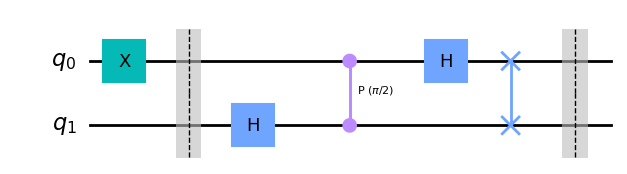

In [19]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from math import sqrt, pi
n= 2
theta = (pi/2)

circ = QuantumCircuit(n)
circ.x(0) #Qubit q_0 wird auf |1> gesetzt
#circ.x(1) #Qubit q_1 wird auf |1> gesetzt
circ.barrier()
circ.h(1) 
circ.cp(theta,0,1) #die Phase von q_1 wird in Abhängigkeit von q_0 um pi/2 gedreht
circ.h(0)
circ.swap(0,1)
circ.barrier()
print(Statevector(circ))
circ.draw('mpl')

Testen Sie alle vier Ausgangszustände ($|00 \rangle$, $|01 \rangle$, $|10 \rangle$ und $|11 \rangle$) durch, indem Sie jeweils `circ.x(0)` oder `circ.x(1)` mit `#` entsprechend auskommentieren und vergleichen Sie die State-Vector Ausgabe mit den von Hand berechneten Zustandsvektoren. Weil in Qiskit die Bitreihenfolge gegenüber der oben von Hand berechneten, umgedreht ist, ist abschliessend das Swap-Gate erforderlich, um die Ergebnisse vergleichen zu können. Damit stimmen die Ergebnisse perfekt überein.



#### Matrix-Darstellung

Die $QFT_4$ lässt sich auch als $4\times 4$-Matrix schreiben:

$$QFT_4=\frac{1}{\sqrt{4}}\begin{bmatrix}1&1&1&1\\1&\omega&\omega^2 &\omega^3 \\1&\omega^2&\omega^4&\omega^6\\1&\omega^3&\omega^6&\omega^9\end{bmatrix}\qquad \text{mit}\qquad \omega=exp{\left(2\pi i/4\right)}=exp{\left(\frac{\pi}{2} i\right)} \qquad \text{ergibt sich konkret:}\qquad QFT_4=\frac{1}{2}\begin{bmatrix}1&1&1&1\\1&i&-1 &-i \\1&-1&1&-1\\1&-i&-1&i\end{bmatrix}$$ 

In den Spalten dieser Matrix stehen die Bilder der Basisvektoren: $|00\rangle$, $|01\rangle$, $|10\rangle$ und $|11\rangle$.

Aus dieser Darstellung wird auch ersichtlich, wie die $QFT_4$ (mit $n=2$ Qubits) auf die $QFT_8$ ($n=3$ Qubits) und darüber hinaus zu erweitern ist.

#### Erweiterung auf $n=3$

Betrachten wir die Erweiterung auf ein Register mit $n=3$ Qubits. Dieses hat die $N=2^3=8$ Basisvektoren: $|000\rangle$, $|001\rangle$, $|010\rangle$, $|011\rangle$, $|100\rangle$, $|101\rangle$, $|110\rangle$ und $|111\rangle$, mit denen sich sämtliche Registerzustände beschreiben lassen. Die $QFT_8$-Matrix ist deshalb von der Grösse $8\times 8$. Wir erweitern dazu einfach die $QFT_4$-Matrix in analoger Fortsetzung. Mit $\omega=exp{\left(2\pi i/8\right)}=exp{\left(\frac{\pi}{4} i\right)}$:

$$QFT_8=\frac{1}{\sqrt{8}}\begin{bmatrix}1&1&1&1&1&1&1&1\\1&\omega&\omega^2 &\omega^3 & \omega^4&\omega^5&\omega^6 &\omega^7 \\1&\omega^2&\omega^4&\omega^6&\omega^8&\omega^{10}&\omega^{12} &\omega^{14} \\1&\omega^3&\omega^6&\omega^9&\omega^{12}&\omega^{15}&\omega^{18} &\omega^{21} \\1&\omega^4&\omega^8&\omega^{12}&\omega^{16}&\omega^{20}&\omega^{24} &\omega^{28}\\1&\omega^5&\omega^{10}&\omega^{15}&\omega^{20}&\omega^{25}&\omega^{30} &\omega^{35}\\1&\omega^6&\omega^{12}&\omega^{18}&\omega^{24}&\omega^{30}&\omega^{36} &\omega^{42}\\1&\omega^7&\omega^{14}&\omega^{21}&\omega^{28}&\omega^{35}&\omega^{42} &\omega^{49}\end{bmatrix}\quad \stackrel{\varphi}{\longmapsto} \quad \frac{1}{2\sqrt{2}}\begin{bmatrix}0&0&0&0&0&0&0&0\\0&1&2&3&4&5&6&7\\0&2&4&6&8&10&12&14\\0&3&6&9&12&15&18&21\\0&4&8&12&16&20&24&28\\0&5&10&15&20&25&30&35\\0&6&12&18&24&30&36&42\\0&7&14&21&28&35&42&49\end{bmatrix}\quad \stackrel{\mod 8}{\longmapsto} \quad\frac{1}{2\sqrt{2}}\begin{bmatrix}0&0&0&0&0&0&0&0\\0&1&2&3&4&5&6&7\\0&2&4&6&0&2&4&6\\0&3&6&1&4&7&2&5\\0&4&0&4&0&4&0&4\\0&5&2&7&4&1&6&3\\0&6&4&2&0&6&4&2\\0&7&6&5&4&3&2&1\end{bmatrix}$$

Hier werden die Koeffizienten z. T. komplex (d. h. mit Real- und Imaginäranteil), was das Aufschreiben umständlich und unübersichtlich macht. Deshalb sind in der mittleren Matrix nur die Exponenten von $\omega$ eingetragen. Benutzen wir die Tatsache, dass sich die Werte nach $8$ Schritten wiederholen, erreichen wir eine weitere Vereinfachung, indem wir in der Matrix rechts die Werte $\mod8$ eintragen. Auch hier kann man die Zustandsvektoren der Abbilder von $|000\rangle$, $|001\rangle$, $|010\rangle$, $|011\rangle$, $|100\rangle$, $|101\rangle$, $|110\rangle$ und $|111\rangle$ in den Spalten dieser Matrix direkt ablesen (allerdings hier in Abh. von $\varphi$).

Der folgende **Schaltkreis** bewitkt diese Transformation auf einem Dreibit-Quantenregister. Ausgegeben werden der Zustandsvektor (`Statevector`) sowie der Schaltkreis.

Testen Sie auch hier alle acht Ausgangszustände ($|000\rangle$, $|001\rangle$, $|010\rangle$, $|011\rangle$, $|100\rangle$, $|101\rangle$, $|110\rangle$ und $|111\rangle$) durch, indem Sie jeweils `circ.x(0)`, `circ.x(1)` und /oder `circ.x(1)` mit `#` entsprechend auskommentieren, und vergleichen Sie die State-Vector Ausgabe mit den Zeigerstellungen der jeweiligen Zustandsvektoren. Auch hier werden Sie Übereinstimmung der Ergebnisse feststellen.


Statevector([ 3.53553391e-01+0.j        ,  2.16489014e-17+0.35355339j,
             -3.53553391e-01+0.j        , -2.16489014e-17-0.35355339j,
              3.53553391e-01+0.j        ,  2.16489014e-17+0.35355339j,
             -3.53553391e-01+0.j        , -2.16489014e-17-0.35355339j],
            dims=(2, 2, 2))


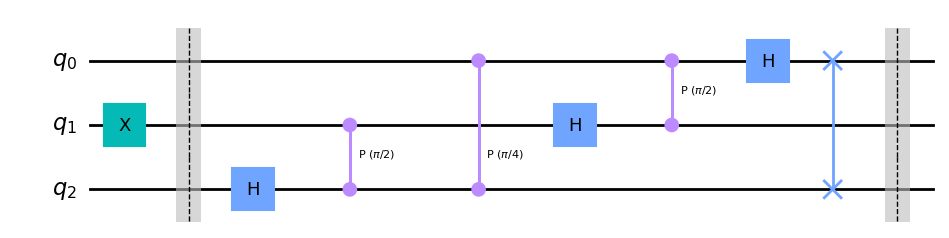

In [20]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from math import sqrt, pi

n= 3
theta = (2*pi)/(2**n)

circ = QuantumCircuit(n)
#circ.x(0)
circ.x(1)
#circ.x(2)
circ.barrier()
circ.h(2) 
circ.cp(2*theta,1,2)
circ.cp(theta,0,2)
circ.h(1) 
circ.cp(2*theta,0,1)
circ.h(0) 
circ.swap(0,2)
circ.barrier()
print(Statevector(circ))
circ.draw('mpl')

#### Verallgemeinerung auf $n$ Qubits

$$QFT_N=\frac{1}{\sqrt{N}}\begin{bmatrix}1&1&1&1&\cdots &1\\1&\omega&\omega^2 &\omega^3 &\cdots &\omega^{(N-1)}\\1&\omega^2&\omega^4&\omega^6&\cdots &\omega^{2(N-1)} \\1&\omega^3&\omega^6&\omega^9&\cdots &\omega^{3(N-1)} \\ \vdots & \vdots & \vdots & \vdots & \ddots &\vdots \\1&\omega^{(N-1)}&\omega^{2(N-1)}&\omega^{3(N-1)}&\cdots &\omega^{(N-1)(N-1)}\end{bmatrix}\qquad \text{mit}\qquad \omega=exp{\left(2\pi i/N\right)}\quad \text{ und Phasendrehwinkel}\quad \varphi_N=\frac{2\pi}{N}$$


Wie Sie sehen, wird es zunehmend mühsamer, die $QFT$s mit grösser werdendem $N$ zu berechnen. Das wollen wir uns hier auch ersparen. Qiskit stellt nämlich eine  Funktion für die $QFT$ zur Verfügung. Die Ausführungen oben dienten nur dazu, das verfahren etwas besser zu verstehen. Schauen wir uns also die Qiskit-Funktion und ihre Verwendung an.

#### Die $QFT$-Funktion von Qiskit



Statevector([ 3.53553391e-01+0.j        ,  2.16489014e-17+0.35355339j,
             -3.53553391e-01+0.j        , -2.16489014e-17-0.35355339j,
              3.53553391e-01+0.j        ,  2.16489014e-17+0.35355339j,
             -3.53553391e-01+0.j        , -2.16489014e-17-0.35355339j],
            dims=(2, 2, 2))


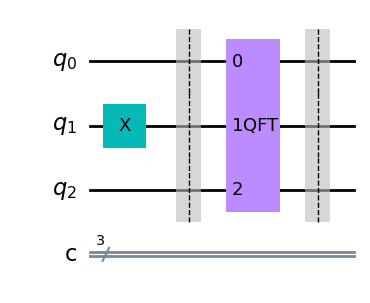

In [21]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')

n=3
circ = QuantumCircuit(n,n)
#circ.x(0) 
circ.x(1)
#circ.x(2)
circ.barrier()
circ.append(QFT(n),range(n))
circ.barrier()
print(Statevector(circ))
circ.draw('mpl')

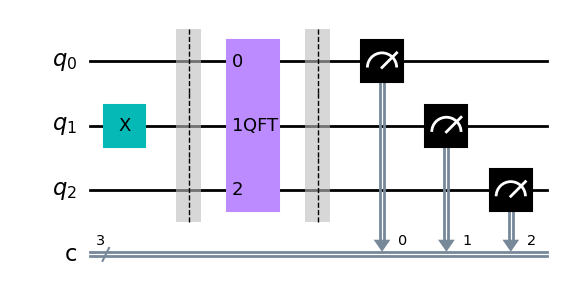

In [22]:
circ.measure([0,1,2], [0,1,2])
circ.draw('mpl')

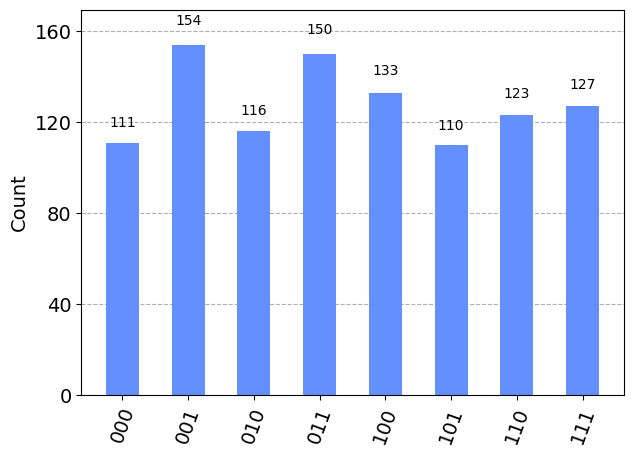

In [23]:
job=execute(circ, backend)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

<img src="Bilder/QFT2.gif" width="800 px">

<img src="Bilder/QFT1.gif" width="800 px">

## Periodensuche mit dem Shor-Algorithmus

Erinnern wir uns, dass zum Faktorisieren von grossen Zahlen die Perioden der Funktion $ f(x) = a^x \bmod{N}$ hilfreich sind. Wie können die Perioden mithilfe eines Quantencomputers gefunden werden. Dazu stellte Peter Shor () einen Algorithmus vor, bei dem insbesondere die oben beschriebene $QFT$ Verwendung findet?

Die Funktion $F(x)$ bildet Zahlen aus der Grundmenge $x \in \mathbb{Z}$ in die Menge der Funktionswerte ab. Das ist ebenfalls eine Zahlenmenge, die hier aber genau definiert ist: $f(x)\in \{0, 1, \ldots, N-1\}$. Diese Zahlenmengen müssen nun durch Qubits ersetzt werden. Wir benötigen dazu zwei Register: Ein Register $\vert a\rangle$ für die Elemente der Grundmenge und ein Register $\vert b\rangle$ für die Funktiionswerte. Die Funktion selbst muss durch entsprechend gewählte Gates $U_f) (Quantenorakel) realisiert werden. Also

Statt klassisch: $f: \mathbb{Z} \mapsto \{0, 1, \ldots, N-1\}$, jetzt quantenmechanisch: $U_f:\vert a \rangle\vert b\rangle \mapsto \vert a \rangle\vert b\oplus f(a)\rangle$.

- Die Grundmenge an Qubitzuständen erreicht man am einfachsten, indem man von $n$ Qubits im Zustand $\vert 0\rangle$ ausgeht und auf jedes Qubit die Hadamard-Transformation ausübt. Dadurch erhält man $N=n^2$ Basisiszustände $\vert 0\rangle \ldots \vert N-1\rangle$ für das Register $\vert a\rangle$. Nach dieser Initialisierung lautet der Registerzustand:

$$
\phi_1=\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\vert k\rangle\vert b\rangle
$$


- Die Funktionswerte *schreibt* man in das Register $\vert b\rangle$ indem man $U_f$ auf $\vert b\rangle$ anwendet: $U_f:\vert a \rangle\vert b\rangle \mapsto \vert a \rangle\vert b\oplus f(a)\rangle$.
$$
\phi_2=\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\vert k\rangle\vert a^k\ mod\ N\rangle
$$
  Die Werte von $\vert a^k\ mod\ N\rangle$ wiederholen sich zyklisch mit der Periode $r$.

- Nun stellt sich die Frage, wie $U_f$ bzw. $\vert a^k\ mod\ N\rangle$ beschaffen sein muss, damit die Funktionswerte von $f(x)$ im Register $\vert b\rangle$ codiert werden können. Weil das Problem ja darin besteht, die Periode $r$ der Funktion $f$ zu finden, benutzt man dazu Phasen-Gatter (Phase-Gates) und kodiert die Funktionswerte von $f$ als Phasen der Qubits im Register $\vert b\rangle$. Die Phase-Gates $P(\varphi)$ sind dann von der Form $e^{\frac{2\pi i}{N}k}$. Dabei nutzt man das Phänomen des **Phase Kickback** aus, das in *Notebook 1* beschrieben wurde. Dazu müssen die Phase Gates als bedingt ausgeführt werden, also als `.cp( ... )`. Dadurch werden die Phasen auf die Qubits von Register $\vert a\rangle$ zurück übertragen und dort gespeichert.
- Schliesslich kann die gesuchte Periode mithilfe der $QFT$ aus dem Register extrahiert werden. und daraus dann die gesuchten Faktoren berechnet werden.

### Konkretes Beispiel

Am besten lässt sich das Verfahren an einem einfachen Beispiel nachvollziehen. Wir betrachten dazu das *Problem*, die Zahl $15$ zu faktorisieren. Das Ergebnis kennen wir: $3\cdot 5=15$. Wir wollen aber zeigen, wie dieses Resultat mit dem Verfahren von Shor zustande kommt.

Dazu *suchen* wir die Periode $r$ der Funktion $f(x)=a^x \mod 15$ und wählen z. B dazu die Basis $a=7$. Wie man leicht nachvollzienen kann, hat die Funktion $7^x \mod 15$ die Periode $r=4$, mit den sich wiederholenden Funktionswerten $\{1,7, 4, 13, \ldots\}$. Wir starten mit zwei Registern mit je $n=4$ Qubits. Jedes der beiden Register kann dann $N=16$ Zustände annehmen.

Die ersten drei Schritte sind in folgender Tabelle zusammengestellt:

<table>
  <thead>
    <tr>
      <th>Initioalisierung</th>
      <th>Hadamards auf Register 1</th>
      <th>Funktionswerte in Register 2 codieren</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>$\phi_0=\vert 000\rangle\vert 000\rangle$</td>
      <td>$$\phi_1=\frac{1}{\sqrt{16}}\sum_{k=0}^{15}\vert k\rangle\vert 0000\rangle$$</td>
      <td>$$\phi_2=\frac{1}{\sqrt{16}}\sum_{k=0}^{15}\vert k\rangle\vert 7^x\ mod\ 15\rangle$$</td>
    </tr>
  </tbody>
</table>

Die Funktionswerte von $7^x\ mod\ 15$ wiederholen sich zyklisch gemäss folgender Tabelle:

<table>
  <tbody>
    <tr>
      <td>$k\quad$:</td><td>$0$</td><td>$1$</td>  <td>$2$</td><td>$3$</td><td>$4$</td><td>$5$</td><td>$6$</td><td>$7$</td> <td>$8$</td><td>$9$</td><td>$10$</td> <td>$11$</td><td>$12$</td><td>$13$</td> <td>$14$</td><td>$15$</td>
    </tr>
    <tr>
      <td>$F(k)$:</td><td>$1$</td><td>$7$</td><td>$4$</td><td>$13$</td><td>$1$</td><td>$7$</td><td>$4$</td><td>$13$</td><td>$1$</td><td>$7$</td><td>$4$</td><td>$13$</td><td>$1$</td><td>$7$</td><td>$4$</td><td>$13$</td>
    </tr>
  </tbody>
</table>

Schreiben wir den Zustand $\phi_2$ aus:

$$
\phi_2=\frac{1}{\sqrt{16}}\sum_{k=0}^{15}\vert k\rangle\vert 7^x\ mod\ 15\rangle=\frac{1}{4}\begin{pmatrix}
  \vert 0 \rangle\vert 1\rangle & + & \vert 1 \rangle\vert 7\rangle & + &\vert 2 \rangle\vert 4\rangle & + &\vert 3 \rangle\vert 13\rangle & + \\
  \vert 4 \rangle\vert 1\rangle & + & \vert 5 \rangle\vert 7\rangle & + &\vert 6 \rangle\vert 4\rangle & + &\vert 7 \rangle\vert 13\rangle & + \\
  \vert 8 \rangle\vert 1\rangle & + & \vert 9 \rangle\vert 7\rangle & + &\vert 10 \rangle\vert 4\rangle & + &\vert 11 \rangle\vert 13\rangle & + \\
  \vert 12 \rangle\vert 1\rangle & + & \vert 13 \rangle\vert 7\rangle & + &\vert 14 \rangle\vert 4\rangle & + &\vert 15 \rangle\vert 13\rangle &\ &
\end{pmatrix}=\frac{1}{4}\left[\left(\vert 0 \rangle+\vert 4 \rangle+\vert 8 \rangle+\vert 12 \rangle \right)\textcolor{red}{\vert 1\rangle}+\left(\vert 1 \rangle+\vert 5 \rangle+\vert 9 \rangle+\vert 13 \rangle \right)\textcolor{red}{\vert 7\rangle}+\left(\vert 2 \rangle+\vert 6 \rangle+\vert 10 \rangle+\vert 14 \rangle \right)\textcolor{red}{\vert 4\rangle}+\left(\vert 3 \rangle+\vert 7 \rangle+\vert 11 \rangle+\vert 15 \rangle \right)\textcolor{red}{\vert 13\rangle}\right]
$$

Messen wir jetzt das Register $2$ erhalten wir einen der vier Messwerte $\textcolor {red}{1, 7, 4,}$ oder $\textcolor {red}{13}$. Gleichzeitig kollabiert das Register $1$ in einen der vier zugehörigen Zustände. Wird also z. B.  eine '$\textcolor {red}{7}$' gemessen, befindet sich das Register $1$ unmittelbar danach im Zustand $$\phi_3=\frac{1}{2}\left(\textcolor{cyan}{\vert 1 \rangle} + \textcolor{cyan}{\vert 5 \rangle} + \textcolor{cyan}{\vert 9 \rangle} + \textcolor{cyan}{\vert 13 \rangle}\right)$$

Gemäss
$$
QFT_N \vert \phi_3\rangle=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}\left(\sum_{j=0}^{N-1}\alpha_j\omega^{jk}  \right)|k\rangle
$$
über alle Basisvektoren $\vert k\rangle_N$ können wir die Quanten Fouriertransformation wiefolgt berechnen:

Auf diesen Zustand wird abschliessend die $QFT$ angewendet:

$$\phi_4=\frac{1}{2}\frac{1}{\sqrt{16}}\sum_{k=0}^{15}\left[\omega^{\textcolor{cyan}{1} k} + \omega^{\textcolor{cyan}{5} k} + \omega^{\textcolor{cyan}{9} k} + \omega^{\textcolor{cyan}{13} k}\right]\vert k \rangle \quad \text{mit}\quad \omega=\exp\left(\frac{\pi}{8}i\right)$$

klammern wir ein $\omega$ aus:

$$\phi_4=\frac{1}{2}\frac{1}{\sqrt{16}}\sum_{k=0}^{15}\omega^k\left[1 + \omega^{\textcolor{red}{4} k} + \omega^{\textcolor{red}{8} k} + \omega^{\textcolor{red}{12} k}\right]\vert k \rangle \quad \text{mit}\quad \omega^4=\exp\left(\frac{\pi}{2}i\right)\quad \text{vereinfacht sich das zu:}$$

$$
\phi_4=\frac{1}{2}\frac{1}{\sqrt{16}}\sum_{k=0}^{15}\omega^k\left[1 + \exp\left(\frac{\pi}{2}i\right)^{\textcolor{red}{1} k} + \exp\left(\frac{\pi}{2}i\right)^{\textcolor{red}{2} k} + \exp\left(\frac{\pi}{2}i\right)^{\textcolor{red}{3} k}\right]\vert k \rangle
$$

Nun können Sie sich relativ leicht selbst davon überzeugen, dass für die eckige Klammer gilt: $\left[\ldots\right]=1+1+1+1$ für alle $k$, die ein Vielfaches von $4$ sind und für alle anderen Fälle $\left[\ldots\right]=0$ ist.











[QFT Heise Online](https://www.heise.de/hintergrund/Quantencomputer-programmieren-Nur-eine-Phase-7358148.html?seite=2)

[QFT auf MS learn](https://learn.microsoft.com/de-de/azure/quantum/tutorial-qdk-qubit-level-program?tabs=tabid-qsharp%2Ctabid-qsharp2)

[IBM Phase-Estimation-and-Factoring](https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring)

[Quantum Computing UK](https://quantumcomputinguk.org/tutorials/quantum-fourier-transform-in-qiskit)

[](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QFT)

[IBM Circuit Library](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QFT)

[IBM Circuit Library](https://docs.quantum.ibm.com/api/qiskit/0.24/qiskit.circuit.library.QFT)

[implementing QFT](https://leftasexercise.com/2019/02/25/implementing-the-quantum-fourier-transform-with-qiskit/)

[Medium QFT](https://medium.com/@_monitsharma/learn-quantum-computing-with-qiskit-quantum-fourier-transform-e27176c8f378)


**Suchfrage:** qiskit code für quanten fourier transformation
                        